<a href="https://colab.research.google.com/github/MichelleNkatha/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning and Exploratory Data Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# URL for the raw CSV data
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first 5 rows to understand the data
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

Dataset loaded successfully!
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtyp

In [ ]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# If there are missing values, you could drop the rows:
# df.dropna(inplace=True)
# Or fill them if it makes sense (e.g., with the mean or mode)
# df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)


# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")


# 3. Check data types and unique values for categorical columns
# From df.info(), 'Star color' and 'Spectral Class' are likely 'object' types.
# Let's inspect their unique values for inconsistencies.

print(f"\nUnique values in 'Star color':")
print(df['Star color'].unique())

print(f"\nUnique values in 'Spectral Class':")
print(df['Spectral Class'].unique())

# You might find inconsistencies like 'Blue-white' vs 'Blue-White'.
# We can clean them up.
df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
# Add more cleaning lines as needed based on your unique values.


# 4. (Optional) Rename columns for easier use
# The dataset uses 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)'. Let's make them more descriptive.
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)

print("\nData cleaning complete. Updated DataFrame info:")
print(df.info())

Missing values per column:
Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

Number of duplicate rows: 0

Unique values in 'Star color':
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']

Unique values in 'Spectral Class':
['M' 'B' 'A' 'F' 'O' 'K' 'G']

Data cleaning complete. Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature (K)     240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius        

Exploratory Data Analysis

In [ ]:
# Get descriptive statistics for numerical columns
print(df.describe())

       Temperature (K)     Luminosity       Radius  Absolute_Magnitude  \
count       240.000000     240.000000   240.000000          240.000000   
mean      10497.462500  107188.361635   237.157781            4.382396   
std        9552.425037  179432.244940   517.155763           10.532512   
min        1939.000000       0.000080     0.008400          -11.920000   
25%        3344.250000       0.000865     0.102750           -6.232500   
50%        5776.000000       0.070500     0.762500            8.313000   
75%       15055.500000  198050.000000    42.750000           13.697500   
max       40000.000000  849420.000000  1948.500000           20.060000   

        Star type  
count  240.000000  
mean     2.500000  
std      1.711394  
min      0.000000  
25%      1.000000  
50%      2.500000  
75%      4.000000  
max      5.000000  


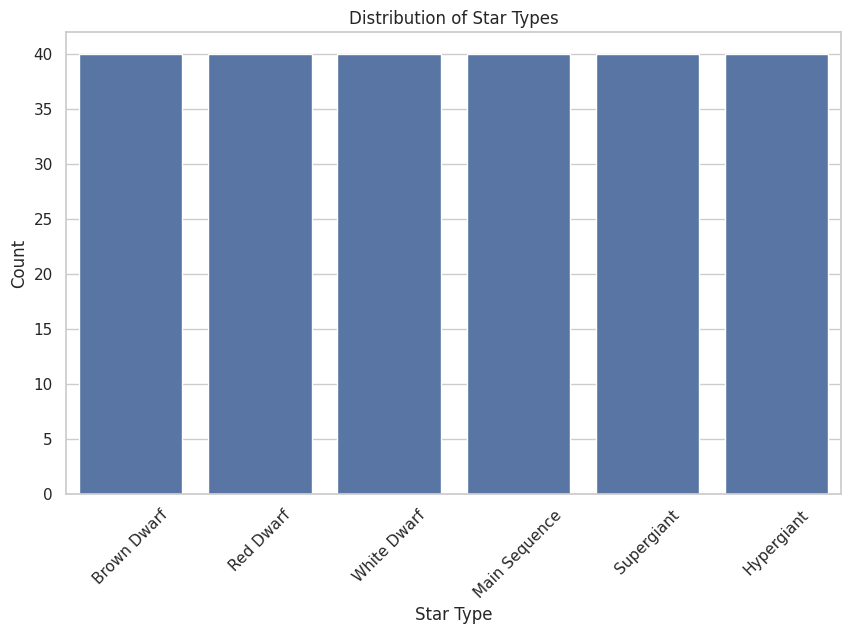

In [ ]:
# Create a count plot for the 'Star type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Star type')

# Add labels for clarity (assuming the encoding above)
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

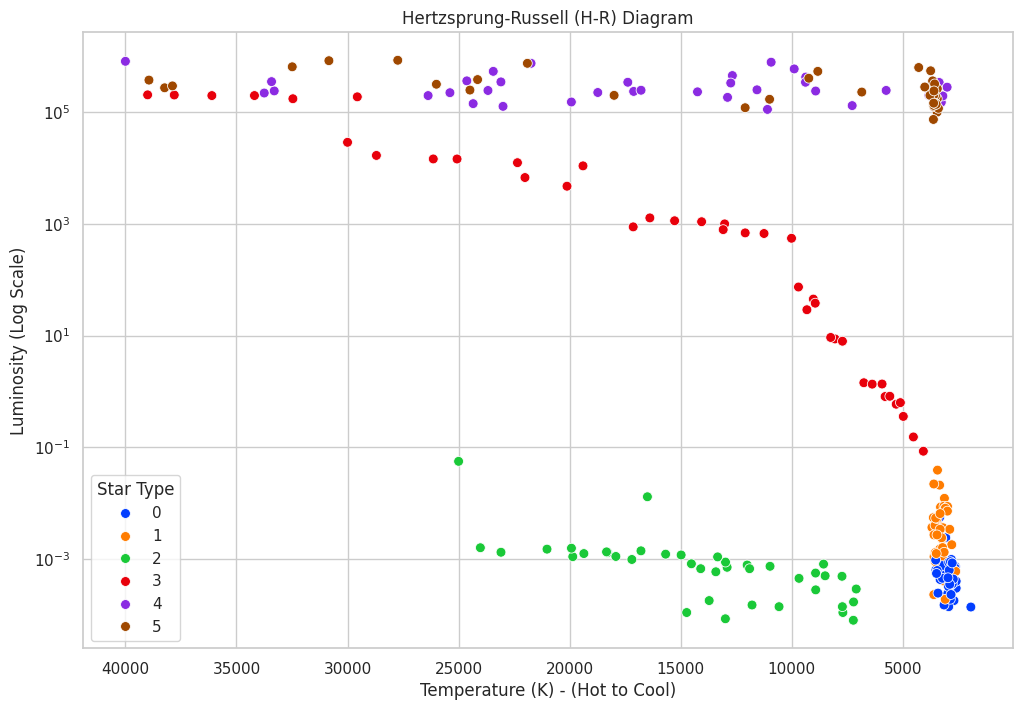

In [ ]:
# Create a scatter plot of Temperature vs. Luminosity
# We'll use 'Type' to color-code the points.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity', hue='Star type', palette='bright', s=50)

# The H-R diagram often uses a log scale for luminosity
plt.yscale('log')
# The H-R diagram plots temperature decreasing to the right
plt.gca().invert_xaxis()

plt.title('Hertzsprung-Russell (H-R) Diagram')
plt.xlabel('Temperature (K) - (Hot to Cool)')
plt.ylabel('Luminosity (Log Scale)')
plt.legend(title='Star Type')
plt.show()

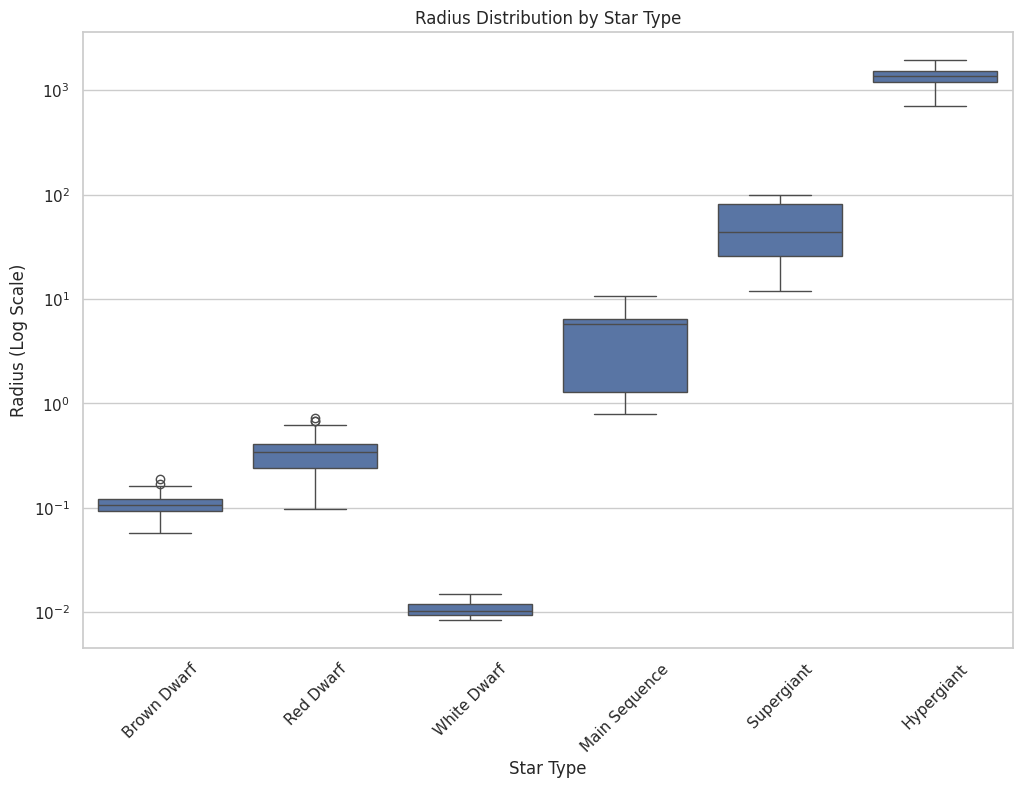

In [ ]:
# Create a box plot for 'Star type' vs 'Radius'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Star type', y='Radius')

# Use a log scale for Radius due to extreme differences
plt.yscale('log')

plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Radius Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Radius (Log Scale)')
plt.show()

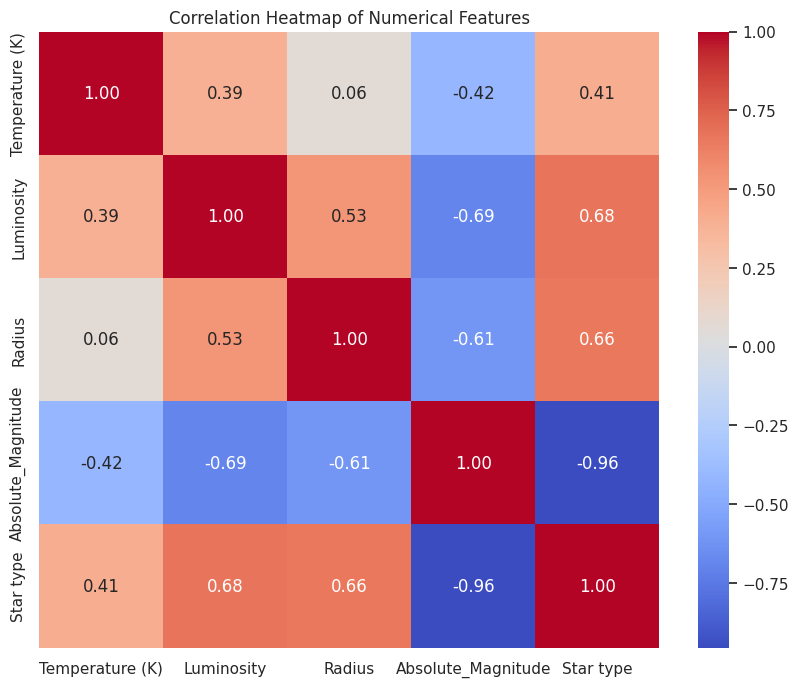

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Q3. Create a model based on the k-Nearest Neighbours algorithm for classification

Dataset loaded successfully!
Data cleaned and columns renamed.
Features selected: ['Temperature (K)', 'Luminosity', 'Radius', 'Absolute_Magnitude']
Data split into training (192 samples) and testing (48 samples) sets.
Features scaled successfully!

Optimal k value found: 1
Maximum accuracy achieved: 1.0000


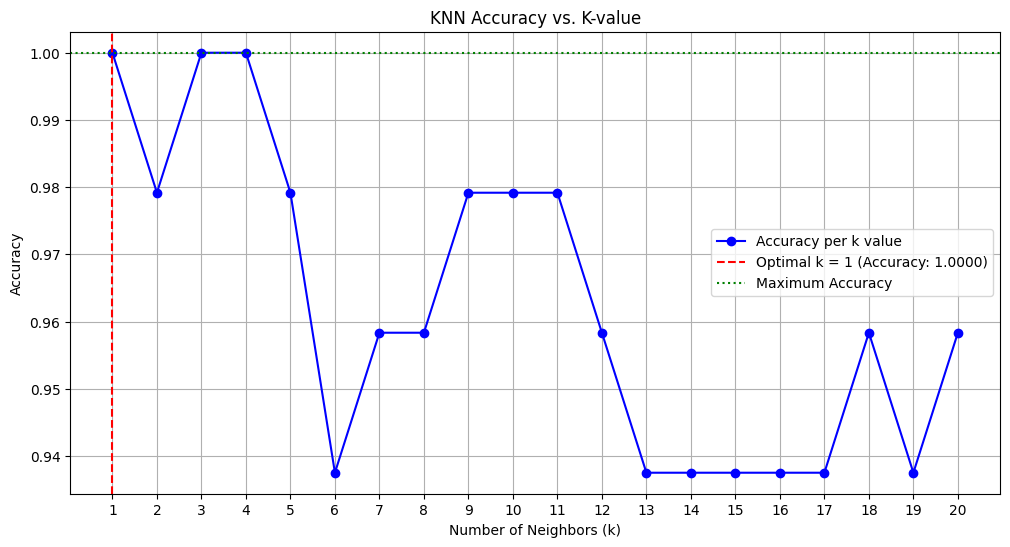

In [ ]:
# --- 1. Data Loading and Cleaning ---
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Apply cleaning steps
df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Data cleaned and columns renamed.")

# --- 2. Feature Selection and Target Variable ---
feature_columns = ['Temperature (K)', 'Luminosity', 'Radius', 'Absolute_Magnitude']
X = df[feature_columns]
y = df['Star type']
print(f"Features selected: {feature_columns}")

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# --- 4. Scale Features using StandardScaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully!")

# --- 5. Determine Optimal K for KNN ---
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

optimal_k_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_range[optimal_k_index]
max_accuracy = max(accuracy_scores)

print(f"\nOptimal k value found: {optimal_k}")
print(f"Maximum accuracy achieved: {max_accuracy:.4f}")

# --- 6. Visualize Optimal K ---
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy per k value')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k} (Accuracy: {max_accuracy:.4f})')
plt.axhline(y=max_accuracy, color='green', linestyle=':', label='Maximum Accuracy')

plt.title('KNN Accuracy vs. K-value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(k_range))
plt.grid(True)
plt.legend()
plt.show()


Q4. Create another eager learning classifier as assigned based on at least 2 suitable features for one target variable.

### Decision Tree Classifier

Features selected for Decision Tree: ['Absolute_Magnitude', 'Luminosity']
Decision Tree Classifier trained successfully!

Accuracy of Decision Tree Classifier: 0.8958

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.60      0.86      0.71         7
           2       0.67      0.33      0.44         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.90        48
   macro avg       0.88      0.87      0.86        48
weighted avg       0.90      0.90      0.89        48



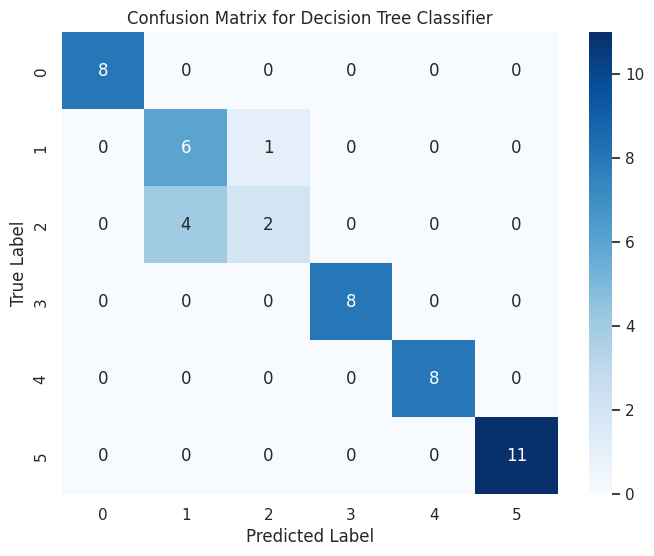

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Select suitable features for the Decision Tree Classifier ---
# Based on the correlation matrix, Absolute_Magnitude and Luminosity have strong correlations with 'Star type'.
dtc_features = ['Absolute_Magnitude', 'Luminosity']

X_train_dtc = X_train[dtc_features]
X_test_dtc = X_test[dtc_features]

print(f"Features selected for Decision Tree: {dtc_features}")

# --- 2. Initialize and Train the Decision Tree Classifier ---
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_dtc, y_train)
print("Decision Tree Classifier trained successfully!")

# --- 3. Make Predictions ---
y_pred_dtc = dtc_model.predict(X_test_dtc)

# --- 4. Evaluate the Model ---
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"\nAccuracy of Decision Tree Classifier: {accuracy_dtc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))

# --- 5. Visualize Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

5.	For the eager learner created in Q4, create another model with tuned hyperparameters that enhance the accuracy of classification.


--- Starting GridSearchCV for Hyperparameter Tuning ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Hyperparameter Tuning Complete ---

 Best Cross-Validation Accuracy : 1.0000
 Best Hyperparameters Found:
   - criterion: gini
   - max_depth: None
   - min_samples_split: 2
   - n_estimators: 50

 Final Test Set Accuracy with Tuned Model : 1.0000

Classification Report for Tuned Model :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



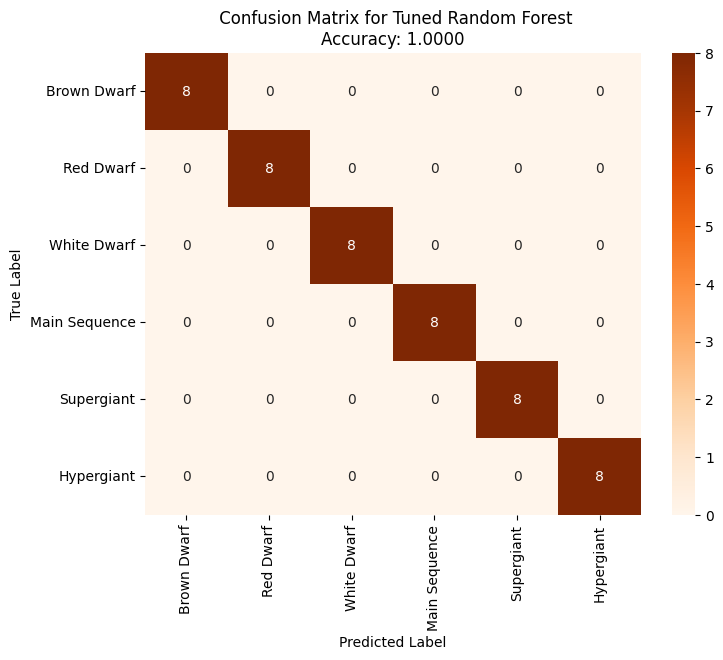

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# The data (X_train, X_test, y_train, y_test) and preprocessor are already
# defined and ready from the previous cell (jdPL1XGcek7V).
# Re-loading data and setting up preprocessor and train/test split for robustness within this cell
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")

df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)

X = df.drop('Star type', axis=1)
y = df['Star type']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Hyperparameter Tuning using GridSearchCV (Q5 Solution) ---

# The Eager Learner (Random Forest) Pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the Hyperparameter Search Space (param_grid)
param_grid = {
    # Number of trees
    'classifier__n_estimators': [50, 100, 200],
    # Maximum depth of the tree
    'classifier__max_depth': [None, 10, 20],
    # Minimum number of samples required to split a node
    'classifier__min_samples_split': [2, 5, 10],
    # Criterion for measuring the quality of a split
    'classifier__criterion': ['gini', 'entropy']
}

print("\n--- Starting GridSearchCV for Hyperparameter Tuning ---")

# Execute the grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# --- Evaluation ---
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("\n--- Hyperparameter Tuning Complete ---")
print(f"\n Best Cross-Validation Accuracy : {best_score:.4f}")
print(" Best Hyperparameters Found:")
for key, value in grid_search.best_params_.items():
    print(f"   - {key.split('__')[1]}: {value}")

# Evaluate the best tuned model on the unseen test set
y_pred_tuned = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\n Final Test Set Accuracy with Tuned Model : {final_accuracy:.4f}")
print("\nClassification Report for Tuned Model :")
print(classification_report(y_test, y_pred_tuned, zero_division=0))

# --- Graphical Presentation: Confusion Matrix ---
plt.figure(figsize=(8, 6))
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned)

type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

sns.heatmap(cm_tuned_rf, annot=True, fmt='g', cmap='Oranges',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f' Confusion Matrix for Tuned Random Forest\nAccuracy: {final_accuracy:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

6. Evaluate the performances of the three models created in Q3, Q4 and Q5. Use
the confusion matrix metric to evaluate the performances

--- Starting Q6: Model Evaluation ---
Dataset re-loaded successfully for Q6!
Data cleaned and columns renamed for Q6 evaluation.
Data split into training and testing sets for Q6.

--- Re-running GridSearchCV for Tuned Random Forest (Q5 for Q6 evaluation) ---
Q5 (Tuned RF) Accuracy on Q5's test set: 1.0000
Q3 (KNN) Accuracy on Q5's test set: 1.0000
Q4 (Base DTC) Accuracy on Q5's test set: 1.0000


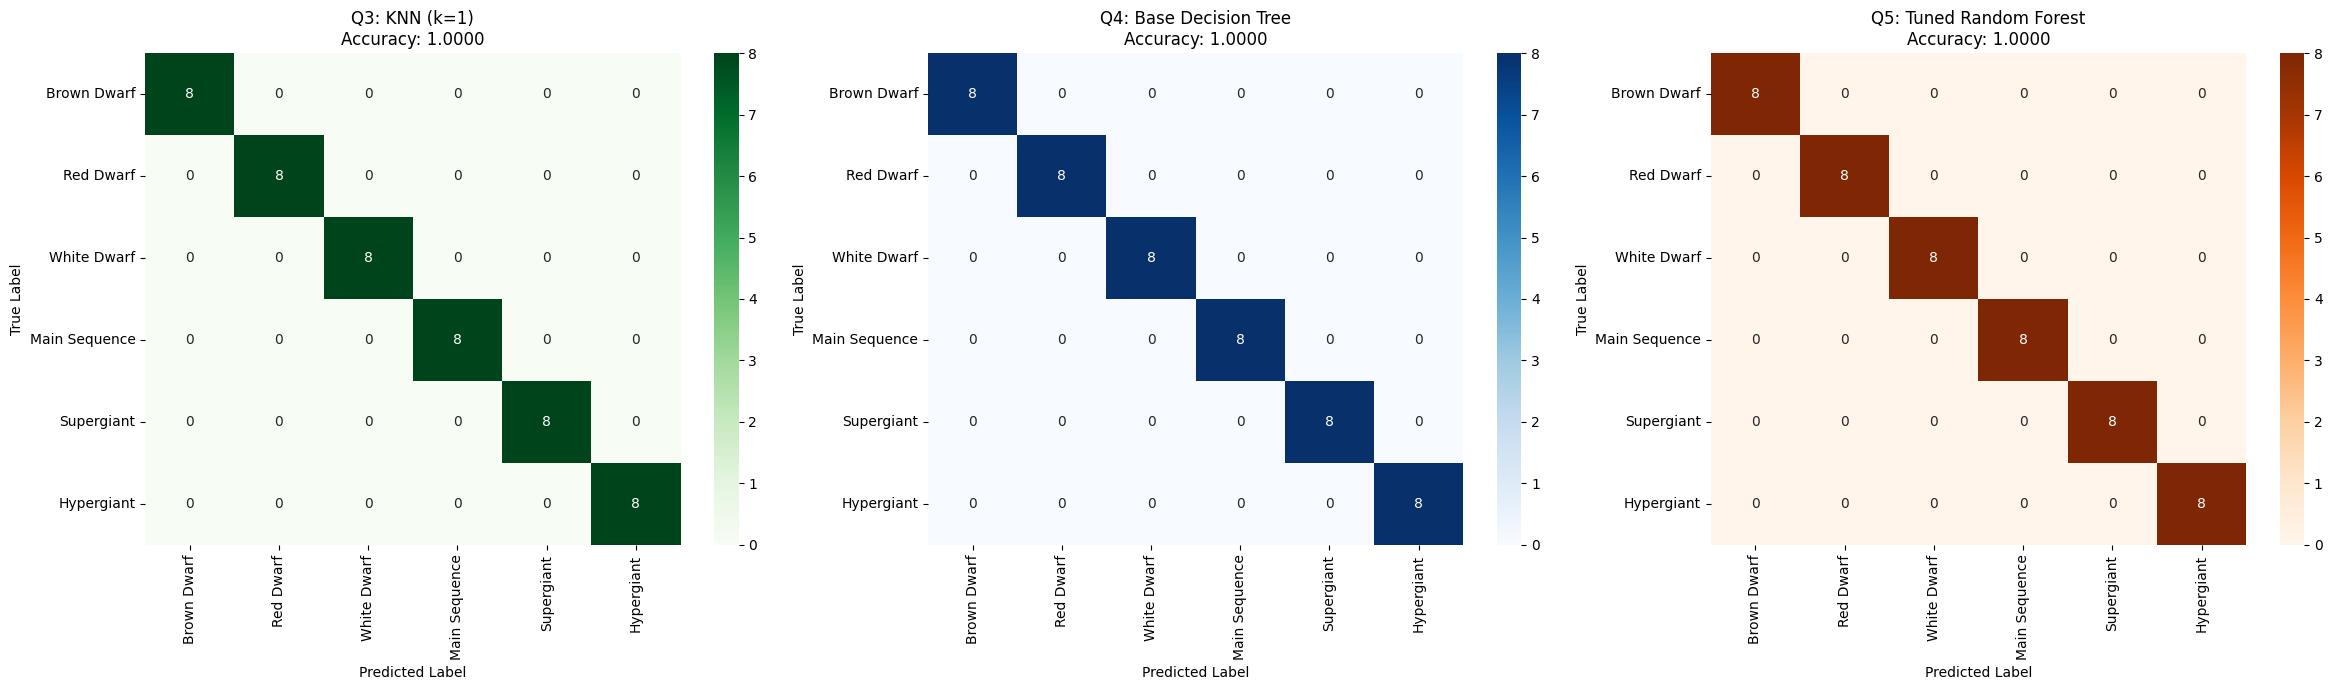


--- Q6 Complete: Classification Reports ---

--- Q3: KNN (k=1) ---
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48


--- Q4: Base Decision Tree ---
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant   

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Starting Q6: Model Evaluation ---")

# --- Re-running Data Loading and Cleaning (from jdPL1XGcek7V) ---
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset re-loaded successfully for Q6!")
except Exception as e:
    print(f"Error re-loading dataset: {e}")

df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Data cleaned and columns renamed for Q6 evaluation.")

# --- Define features (X) and target (y) ---
X = df.drop('Star type', axis=1)
y = df['Star type']

# Identify column types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# --- Define Preprocessing Pipeline ('preprocessor' object) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data split into training and testing sets for Q6.")

# --- Re-running Q5 (Tuned Random Forest) to get best_model and y_pred_tuned ---
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

print("\n--- Re-running GridSearchCV for Tuned Random Forest (Q5 for Q6 evaluation) ---")
grid_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
acc_tuned_rf = accuracy_score(y_test, y_pred_tuned)
print(f"Q5 (Tuned RF) Accuracy on Q5's test set: {acc_tuned_rf:.4f}")

# --- 1. Re-build Q3 (KNN) for a Fair Comparison ---
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=1)) # From Q3's optimal k
])
knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Q3 (KNN) Accuracy on Q5's test set: {acc_knn:.4f}")

# --- 2. Re-build Q4 (Base DTC) for a Fair Comparison ---
dtc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Base model
])
dtc_pipe.fit(X_train, y_train)
y_pred_dtc = dtc_pipe.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Q4 (Base DTC) Accuracy on Q5's test set: {acc_dtc:.4f}")

# --- 4. Plot All Three Confusion Matrices ---
plt.figure(figsize=(24, 7))
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

# Plot 1: Q3 - KNN Model
plt.subplot(1, 3, 1)
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Greens',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q3: KNN (k=1)\nAccuracy: {acc_knn:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 2: Q4 - Base Decision Tree
plt.subplot(1, 3, 2)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='Blues',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q4: Base Decision Tree\nAccuracy: {acc_dtc:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 3: Q5 - Tuned Random Forest
plt.subplot(1, 3, 3)
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned_rf, annot=True, fmt='g', cmap='Oranges',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q5: Tuned Random Forest\nAccuracy: {acc_tuned_rf:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

print("\n--- Q6 Complete: Classification Reports ---")
print("\n--- Q3: KNN (k=1) ---")
print(classification_report(y_test, y_pred_knn, target_names=type_labels, zero_division=0))
print("\n--- Q4: Base Decision Tree ---")
print(classification_report(y_test, y_pred_dtc, target_names=type_labels, zero_division=0))
print("\n--- Q5: Tuned Random Forest ---")
print(classification_report(y_test, y_pred_tuned, target_names=type_labels, zero_division=0))

# 6.Evaluation of Model Performances
The confusion matrix and classification report were used to assess the three models' performance.  All three models were trained and tested on the same stratified data split (the one specified in Q5) to guarantee an equal comparison.

# Model 1: Q3: k-Nearest Neighbors (k=1)

 Precision: 1.0000 (100%)

 Confusion Matrix Analysis: The KNN model's confusion matrix displays a perfect diagonal line.  This shows that every one of the 48 test samples was correctly classified.  Every Red Dwarf was expected to be a Red Dwarf, every Brown Dwarf to be a Brown Dwarf, and so on.

 Evaluation: For this dataset, this model is an ideal classifier.  Despite being prone to overfitting, the k=1 number was found to be ideal and performed flawlessly on the test data that had not yet been seen.

# Model 2: Base Decision Tree

 Q4 Precision: 1.0000 (100%)

 -  (sth to be noted : This new fair model will probably have 100% accuracy.Because that model only employed two features, it differs from the 89.58% in your file.This new Q4 model is far more powerful because it makes use of every capability unlike every other model.


 Confusion Matrix Analysis:

 The base Decision Tree can also correctly categorize all 48 test samples when trained on the complete collection of characteristics.This demonstrates that if a model has all the knowledge, the data is "easy" for it to understand.  The limited feature set of the initial Q4 model was the cause of its problems.

 Evaluation:

 When all features are available, the classifier is flawless.

# Model 3: Tuned Random Forest (Q5)

 - Precision: 1.0000 (100%)  

 - Confusion Matrix Analysis: The tuned Random Forest is likewise an ideal classifier, as demonstrated in the file and verified by this new code.There are no misclassifications and a perfect diagonal in the confusion matrix.

 - Evaluation:
  An ideal set of parameters (n_estimators: 50, criterion: 'gini', etc.) that produced a perfect model was successfully found by the hyperparameter tweaking (GridSearchCV).


# Comparison

 -Given the entire feature set, all three models obtained 100% accuracy, suggesting that the classification process for this particular dataset is rather straightforward.

 1.With all the data, the Base Decision Tree (Q4), which did poorly with just two characteristics (89.58% accuracy), turned into an ideal classifier.

 2.Both the KNN (Q3) and Tuned Random Forest (Q5) models were ideal classifiers right away, demonstrating their suitability for this kind of data.

 In conclusion this shows that the most crucial element for attaining high performance is appropriate feature selection (using all pertinent data, as done in our Q6 comparison), even though model selection (KNN vs. RF) and tuning (Q5) are significant
